Omitting the league that we will use for GAS-model. 

In [191]:
import os
import sys
import pandas as pd
import numpy as np
import create_dicts


code_path = os.getcwd()
data_path = "C:/Users/XHK/Desktop/thesis_code/events_analysis/data/raw/kaggle"

event_type1, event_type2, side, shot_place, shot_outcome, location, \
    bodypart, assist_method, situation = create_dicts.get_dictionaries()

events = pd.read_csv('/'.join([data_path, "events.csv"]))
ginf = pd.read_csv('/'.join([data_path, "ginf.csv"]))

events_columns = ['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
                  'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
                  'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
                  'location', 'bodypart', 'assist_method', 'situation', 'fast_break']

ginf_columns = ['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season',
                'country', 'ht', 'at', 'fthg', 'ftag', 'odd_h', 'odd_d', 'odd_a',
                'odd_over', 'odd_under', 'odd_bts', 'odd_bts_n']


def exempt_a_league(matches, events, exempted_league):
    # exempts a league from the dataset
    # returns dataframe of matches which have adv_stats available
    # returns dataframe of events for those matches
    matches = matches[(matches.adv_stats == True) &
                      (matches.league != exempted_league)]
    events = events.loc[events.id_odsp.isin(matches.id_odsp)]

    return matches, events


matches, events = exempt_a_league(ginf, events, exempted_league='F1')




Getting dictionaries to analyse events.csv


In [192]:
matches.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
5,lOpzwMkp/,/soccer/germany/bundesliga-2011-2012/hertha-be...,True,2011-08-06,D1,2012,germany,Hertha Berlin,Nurnberg,0,1,2.06,3.75,3.95,NaN,NaN,NaN,NaN
9,Wn69eU5B/,/soccer/germany/bundesliga-2011-2012/koln-wolf...,True,2011-08-06,D1,2012,germany,FC Cologne,VfL Wolfsburg,0,3,3.00,3.80,2.54,NaN,NaN,NaN,NaN


Omitting 'own goals' from goal stats.

In [193]:
events = events[events['event_type2'] !=15]
events = events[events['event_type'] == 1]


In [194]:
def rename_categorical_variable_outcomes(events):
    events.event_type = events.event_type.apply(lambda x: event_type1.get(x))
    events.side = events.side.apply(lambda x: side.get(x))
    events.shot_place = events.shot_place.apply(lambda x: shot_place.get(x))
    events.shot_outcome = events.shot_outcome.apply(lambda x: shot_outcome.get(x))
    events.location = events.location.apply(lambda x: location.get(x))
    events.bodypart = events.bodypart.apply(lambda x: bodypart.get(x))
    events.assist_method = events.assist_method.apply(lambda x: assist_method.get(x))
    events.situation = events.situation.apply(  lambda x: situation.get(x))
    return events


events = events.drop(['text'], axis='columns')


In [195]:
#events.to_csv('attempt_weighter_data.csv')
events = rename_categorical_variable_outcomes(events)
#events.to_csv('attempt_weighter_data_named_text.csv')
events.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

Create dataset with dummy-columns for Python-based analysis (above was for SPSS which handles that internally)

In [196]:
events.columns
X_columns =  'time side location bodypart assist_method situation'.split()
X_cat_columns = 'side location bodypart assist_method situation'.split()
#pd.get_dummies()
y = events.is_goal
X = events[X_columns].copy()


In [197]:
X = pd.get_dummies(X[X_cat_columns], drop_first=True)
X = pd.concat((events.time.copy(), X), axis = 'columns')
X
import sklearn
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(X,y, test_size = 0.33, random_state = 20)



In [198]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

#classifier
gnb = GaussianNB()
bnb = BernoulliNB()



gauss_model = gnb.fit(train, train_labels)
berno_model = bnb.fit(train, train_labels)
X




,time,side_Home,location_Difficult angle and long range,location_Difficult angle on the left,location_Difficult angle on the right,location_Left side of the box,location_Left side of the six yard box,location_Long range,location_More than 35 yards,location_More than 40 yards,...,location_Very close range,bodypart_left foot,bodypart_right foot,assist_method_Headed pass,assist_method_None,assist_method_Pass,assist_method_Through ball,situation_Free kick,situation_Open play,situation_Set piece
0,2,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
11,14,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
13,17,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
14,19,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
17,20,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,81,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
940991,84,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
940992,86,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
940993,87,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [199]:
results_gauss = gauss_model.predict(test)
results_berno = bnb.predict(test)

In [200]:
from sklearn.metrics import accuracy_score 

print(accuracy_score(results_gauss, test_labels))
print(accuracy_score(results_berno, test_labels))


0.8502302981221845
0.8936579440198411


In [201]:
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score


print('gaussNB results: ROC_AUC score: ', roc_auc_score(y_true= test_labels, y_score = results_gauss))
print('bernoNB results, ROC_AUC score: ', roc_auc_score(y_true=test_labels, y_score=results_berno))


gaussNB results: ROC_AUC score:  0.6682796459451977
bernoNB results, ROC_AUC score:  0.6164865718523649


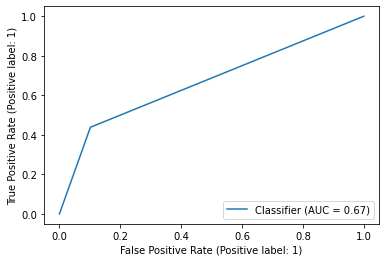

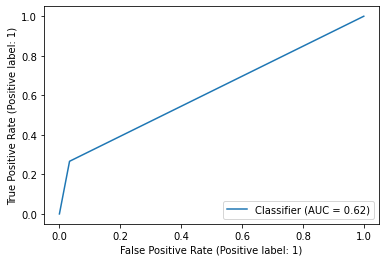

In [202]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(test_labels, y_pred=results_gauss,)
plt.show()
RocCurveDisplay.from_predictions(test_labels, y_pred = results_berno)
plt.show()



In [203]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix formatting: \n  True Negative    False Positive \n False Negative      True Positive') 
print('gaussianNB confusion matrix:\n ', confusion_matrix(test_labels, results_gauss))
print('BernouilliNB confusion matrix \n', confusion_matrix(test_labels, results_berno))


Confusion matrix formatting: 
  True Negative    False Positive 
 False Negative      True Positive
gaussianNB confusion matrix:
  [[47684  5405]
 [ 3472  2710]]
BernouilliNB confusion matrix 
 [[51322  1767]
 [ 4536  1646]]


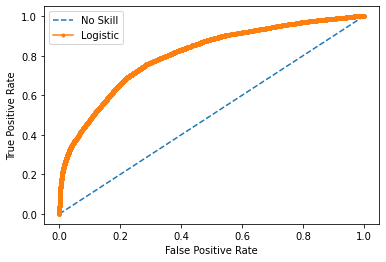

In [204]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

X.time = X.time/max(X.time)
trainX, testX, trainy, testy = train_test_split(
    X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='saga', penalty='l1')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()



In [205]:
X

,time,side_Home,location_Difficult angle and long range,location_Difficult angle on the left,location_Difficult angle on the right,location_Left side of the box,location_Left side of the six yard box,location_Long range,location_More than 35 yards,location_More than 40 yards,...,location_Very close range,bodypart_left foot,bodypart_right foot,assist_method_Headed pass,assist_method_None,assist_method_Pass,assist_method_Through ball,situation_Free kick,situation_Open play,situation_Set piece
0,0.02,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
11,0.14,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
13,0.17,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
14,0.19,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
17,0.20,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940983,0.81,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
940991,0.84,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
940992,0.86,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
940993,0.87,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
